<a href="https://colab.research.google.com/github/2SEHI/2SEHI/blob/Aicow/Aicow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

공통모듈

In [1]:
## 공통 모듈
# pip install natsort
# pip install pycocotools

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
import os
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import natsorted
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import shutil
# 첫번째 매개변수는 압축을 해제할 zip파일의 경로
# 두번째 매개변수는 압축해제된 내용을 저장할 디렉토리 경로입니다.
shutil.unpack_archive('/[라벨]소_bbox.zip','./datasets/label_cow_bbox/')
shutil.unpack_archive('/[라벨]소_keypoints.zip','./datasets/label_cow_keypoints/')
shutil.unpack_archive('/[원천]소_bbox.zip','./datasets/image_cow_bbox/')
shutil.unpack_archive('/[원천]소_keypoints.zip','./datasets/image_cow_keypoints/')

In [5]:
class CustomDataSet(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image)
        return tensor_image

img_folder_path = '/content/drive/MyDrive/Colab Notebooks/AIcow/datasets/sample_image_cow_bbox/'

trsfm = transforms.Compose([
                             #  transforms.Scale(128),       # 한 축을 128로 조절하고
                              # transforms.CenterCrop(128),  # square를 한 후,
                               transforms.ToTensor(),       # Tensor로 바꾸고 (0~1로 자동으로 normalize)
                            #  transforms.Normalize((0.5, 0.5, 0.5),  # -1 ~ 1 사이로 normalize
                              #                     (0.5, 0.5, 0.5)), # (c - m)/s 니까...
                           ])


my_dataset = CustomDataSet(img_folder_path, transform=trsfm)
batch_size = 32
train_loader = DataLoader(my_dataset , batch_size=batch_size, shuffle=True, num_workers=2)

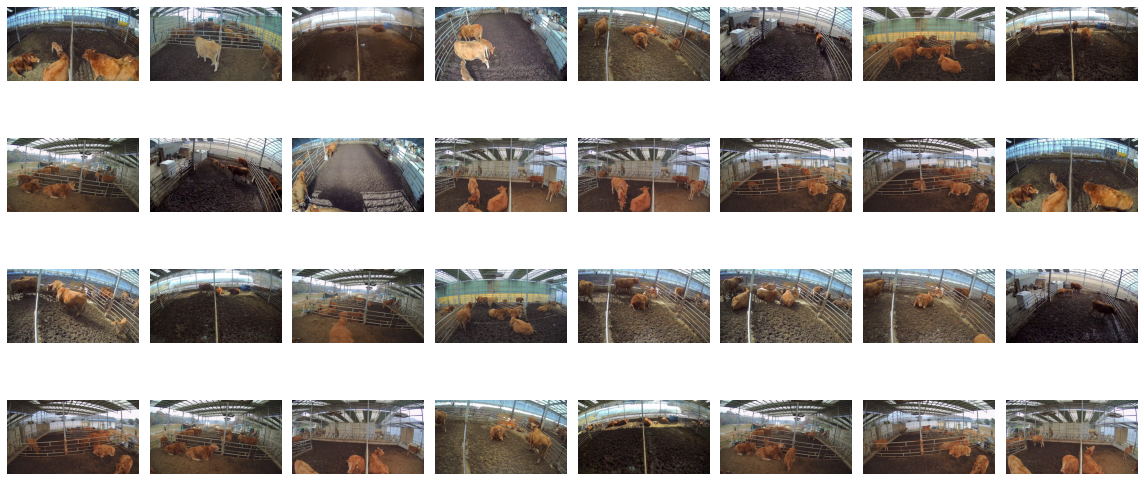

In [6]:
# 데이터 가져오기
batch = next(iter(train_loader))

# 첫번째 데이터 블럭 가져오기
images, labels = batch[0], batch[1]

def imshows(*ims, figsize=None):
    figsize = (16, 8)
    plt.figure(figsize=figsize)
    for i in range(len(batch)):
        plt.subplot(4, 8, i+1)
        plt.imshow(np.transpose(batch[i], (1, 2, 0)))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

imshows(batch)
